<a href="https://colab.research.google.com/github/Pjh940114/Study_choonang/blob/main/%5Bch_0517%5D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CNN**

CNN은 Convolutional Neural Networks의 약자로 딥러닝에서 주로 이미지나 영상 데이터를 처리할 때 쓰이며 이름에서 알수있다시피 Convolution이라는 전처리 작업이 들어가는 Neural Network 모델입니다.

그렇다면 왜 CNN이라는 방법을 쓰기 시작했을까요? 이에 대한 답은 일반 DNN(Deep Neural Network)의 문제점에서부터 출발합니다. 일반 DNN은 기본적으로 1차원 형태의 데이터를 사용합니다. 때문에 (예를들면 1028x1028같은 2차원 형태의)이미지가 입력값이 되는 경우, 이것을 flatten시켜서 한줄 데이터로 만들어야 하는데 이 과정에서 이미지의 공간적/지역적 정보(spatial/topological information)가 손실되게 됩니다. 또한 추상화과정 없이 바로 연산과정으로 넘어가 버리기 때문에 학습시간과 능률의 효율성이 저하됩니다.

이러한 문제점에서부터 고안한 해결책이 CNN입니다. CNN은 이미지를 날것(raw input) 그대로 받음으로써 공간적/지역적 정보를 유지한 채 특성(feature)들의 계층을 빌드업합니다. CNN의 중요 포인트는 이미지 전체보다는 부분을 보는 것, 그리고 이미지의 한 픽셀과 주변 픽셀들의 연관성을 살리는 것입니다.

왜 CNN을 쓰는지 조금 더 쉽게 예를 들어 봅시다.

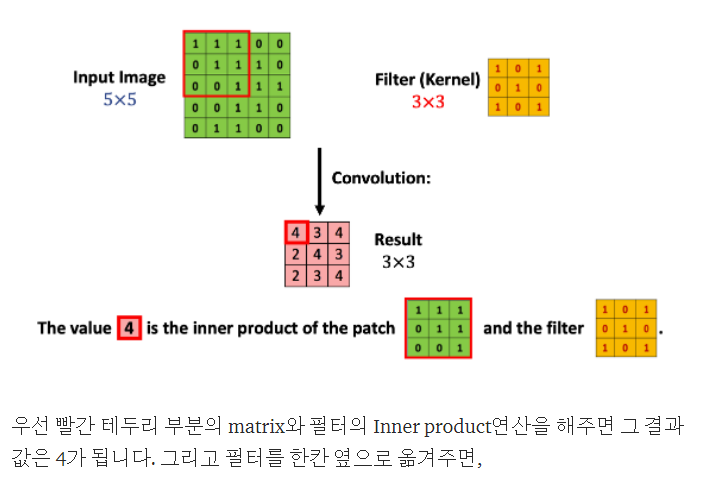

Inner Product :

Input Image 와 Filter(Kernel) 연산처리

5x5 와 3x3 을 연산했을때 결과값이 3x3 이 나오는 이유:

입력값 : d_1 x d_2

필터 : k_1 x k_2

결과값 : (d_1 - k_1 + 1) x (d_2 - k_2 + 1)

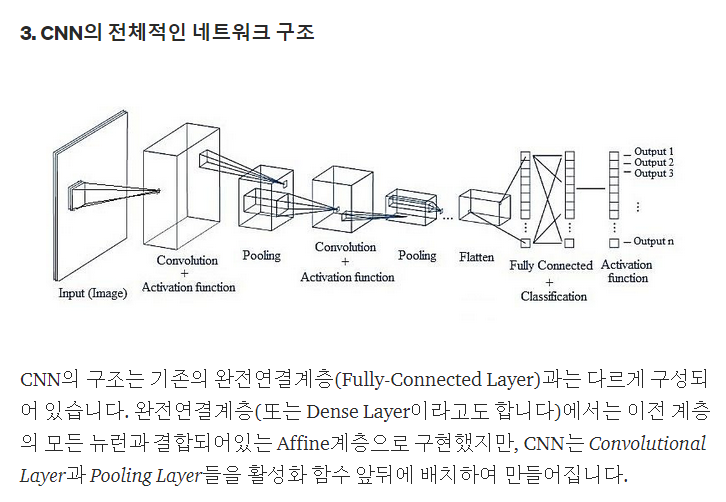

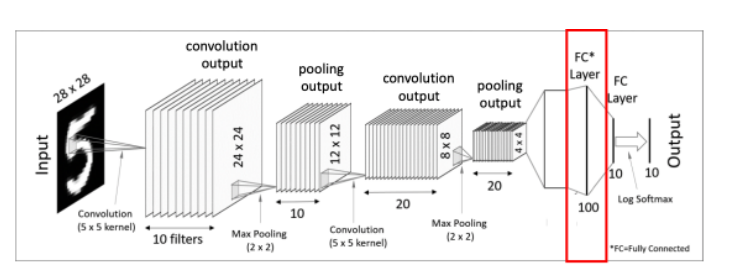


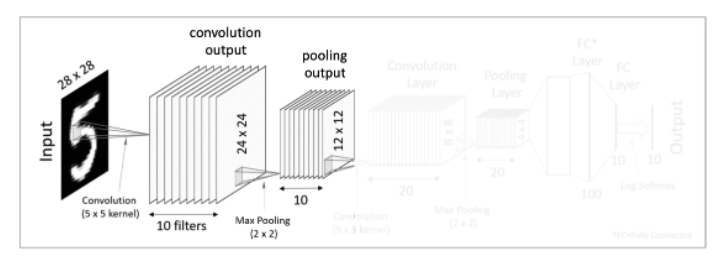

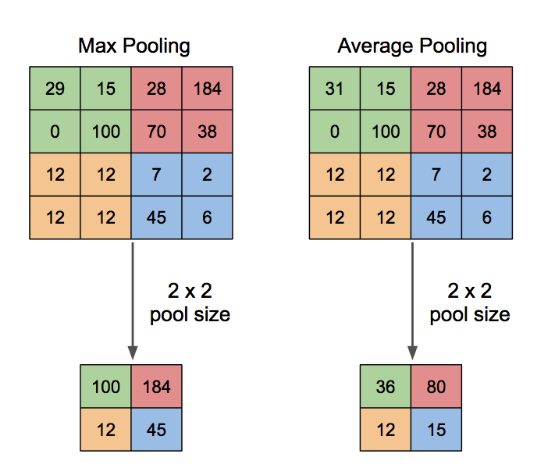

Pooling:

Max Pooling : matrix에서 가장 큰 값
Average Pooling : matrix 에서 평균 값

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mnist_train.csv")

In [ ]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
import tensorflow as tf         # tensorflow 기본
from tensorflow.keras.models import Sequential   # 모델 BOX 정의
from tensorflow.keras.layers import Flatten, Dense   # 모델 BOX Input Layer, Output layer

from tensorflow.keras.optimizers import SGD   # 알고리즘 담당
from sklearn.model_selection import train_test_split   # train, test 데이터를 분리
from sklearn.preprocessing import MinMaxScaler    # 데이터 정규화  - 큰숮자를 작은 숫자로 변경 (-1 ~ 1)

In [ ]:
X_data = df.drop('label', axis=1, inplace=False)

In [ ]:
X_data.shape

(2294, 784)

In [ ]:
Y_data = df['label']

In [ ]:
# 픽셀 데이터를 정규화(0~1 사이의 실수로 변환)
scaler = MinMaxScaler()                    # scaler 객체 생성
scaler.fit(X_data)                         # scaler 객체를 학습
norm_x_data = scaler.transform(X_data)     # scaler를 통해서 실제값을 변환

In [ ]:
norm_train_x_data, norm_test_x_data, train_y_data, test_y_data = train_test_split(norm_x_data, Y_data, test_size=0.3)

In [ ]:
norm_train_x_data.shape

(1605, 784)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu',
    input_shape=(28,28,1)))

In [ ]:
model.add(Conv2D(filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu'))

In [ ]:
# FC layer(DNN) 의; input Layer
model.add(Flatten())  # 전체 4차원 에서 2차원으로 바꾸주는것

In [ ]:
# hidden  layer
model.add(Dense(units=256, activation='relu'))

In [ ]:
# output  layer
model.add(Dense(units=10, activation='softmax'))

In [ ]:
#model이 어떻게 동작하는지를 지정
model.compile(optimizer=SGD(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
norm_train_x_data.shape

(1605, 784)

In [ ]:
norm_train_x_data = norm_train_x_data.reshape(-1,28,28,1)

In [ ]:
norm_train_x_data.shape

(1605, 28, 28, 1)

In [ ]:
# 설정을 모두 마치었으면 모델 학습
model.fit(norm_train_x_data, train_y_data, epochs=30,
          batch_size = 100,
         verbose=1,
         validation_split=0.2)

Epoch 1/30
13/13 [==============================] - 5s 338ms/step - loss: 2.3001 - accuracy: 0.1223 - val_loss: nan - val_accuracy: 0.1090
Epoch 2/30
13/13 [==============================] - 4s 326ms/step - loss: 2.3000 - accuracy: 0.1223 - val_loss: nan - val_accuracy: 0.1090
Epoch 3/30
13/13 [==============================] - 5s 378ms/step - loss: 2.2998 - accuracy: 0.1223 - val_loss: nan - val_accuracy: 0.1121
Epoch 4/30
13/13 [==============================] - 8s 604ms/step - loss: 2.2997 - accuracy: 0.1223 - val_loss: nan - val_accuracy: 0.1121
Epoch 5/30
13/13 [==============================] - 5s 386ms/step - loss: 2.2995 - accuracy: 0.1238 - val_loss: nan - val_accuracy: 0.1153
Epoch 6/30
13/13 [==============================] - 4s 324ms/step - loss: 2.2994 - accuracy: 0.1254 - val_loss: nan - val_accuracy: 0.1153
Epoch 7/30
13/13 [==============================] - 4s 324ms/step - loss: 2.2992 - accuracy: 0.1254 - val_loss: nan - val_accuracy: 0.1184
Epoch 8/30
13/13 [=========

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               1638656   
                                                      

In [ ]:
import matplotlib.pyplot as plt

[참고자료](https://halfundecided.medium.com/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-cnn-convolutional-neural-networks-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-836869f88375)